# HU Exploration 

<font color = 'blue' size = 3> Seems like the interactive feature of this notebook is not avilable unless you do edit/run. </font>   
<font color = 'blue' size = 3> If you would like to play around with the HU Width and Center values, Copy the notebook, go to Edit, and run all cells </font>  


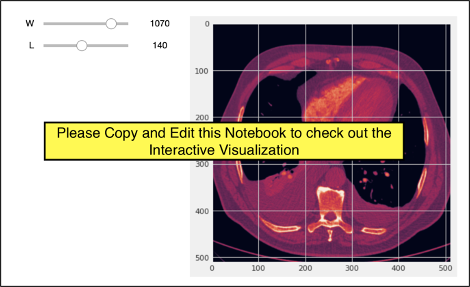


Thank you!


* created: 09-17-2020
* updates: 
    * [09-17-2020]: created notebook and added codes for interactive visualization 
    * [09-18-2020]: added descriptions 

**What is Hounsfield Unit (HU)?:**   
To be added

**Steps involved:**   
To be added

**References:**  
[1] Great explanation on HU and ranges: https://www.stepwards.com/?page_id=21646   
[2] To be added

In [ ]:
import os
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
%matplotlib inline

# dcm 
import pydicom
from pydicom.pixel_data_handlers.util import apply_modality_lut

from colorama import Fore, Back, Style


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

from ipywidgets import interact, interactive, IntSlider, Layout
import ipywidgets as widgets

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
random.seed(12)

# take a random sample of a training DICOM file
TRAIN_FILE_PATH = "/kaggle/input/rsna-str-pulmonary-embolism-detection/train"
sample_StudyInstanceUID = random.choice(os.listdir(TRAIN_FILE_PATH))

FULL_SAMPLE_PATH = TRAIN_FILE_PATH + '/' + sample_StudyInstanceUID
sample_SeriesInstanceUID = random.choice(os.listdir(FULL_SAMPLE_PATH))

FULL_SAMPLE_PATH += '/' + sample_SeriesInstanceUID
sample_SOPInstanceUID = os.listdir(FULL_SAMPLE_PATH)[0]

FULL_SAMPLE_PATH += '/' + sample_SOPInstanceUID
print("Selected Sample: " + FULL_SAMPLE_PATH)

In [ ]:
# get dicom instance
img_dicom = pydicom.read_file(FULL_SAMPLE_PATH)
sample_img = img_dicom.pixel_array

# apply rescaling
slope = img_dicom.RescaleSlope
intercept = img_dicom.RescaleIntercept
sample_img = sample_img * slope + intercept

## Static Plot

In [ ]:
# static plots
DIM = 10

fig= plt.figure(figsize=(DIM,DIM))
W = 400
L = 40

img_min = L - W // 2 # lowest_visible_value
img_max = L + W // 2 # highest_visible_value

test_img = sample_img.copy()

test_img[test_img < img_min] = img_min # setting any value lower than lowest_visible_value to lowest_visible_value 
test_img[test_img > img_max] = img_max # setting any value higher than highest_visible_value to highest_visible_value

plt.imshow(test_img)
plt.show()

## Interactive Plot
Here, you can freely adjust the W and L parameters and view what the resulting CT image is. 

In [ ]:
DIM = 6 

min_hu = min(sample_img.flatten().tolist())//10*10
max_hu = max(sample_img.flatten().tolist())//10*10

W = widgets.IntSlider(description='W', min = min_hu, max = max_hu, step = 10)
L = widgets.IntSlider(description='L', min = min_hu, max = max_hu, step = 10)

def f(W, L):
    img_min = L - W // 2 # lowest_visible_value
    img_max = L + W // 2 # highest_visible_value

    test_img = sample_img.copy()

    test_img[test_img < img_min] = img_min # setting any value lower than lowest_visible_value to lowest_visible_value 
    test_img[test_img > img_max] = img_max # setting any value higher than highest_visible_value to highest_visible_value
    fig = plt.figure(figsize=(DIM,DIM))
    plt.imshow(test_img)

out = widgets.interactive_output(f, {'W': W, 'L': L})

widgets.HBox([widgets.VBox([W, L]), out])

<font color = 'blue'> I will have the list of useful resources + summaries updated to notebook during the weekend :)   In the mean time, happy to hear any suggestions, comments, or findings. Thank you! </font>